# EDA – Portfolio Project

### Objective 
Analyze the food dataset to identify key factors contributing to ineffective marketing campaigns and provide actionable insights for the Chef Marketing Officer to:

- Diagnose campaign shortcomings
- Develop targeted strategies for improvement
- Create more effective and productive marketing initiatives

### About the Dataset:
The data set consists of 2206 customers of XYZ company with data on:
-  Customer profiles
- Product preferences
- Campaign successes/failures
- Channel performance

### Attributes 
**i: Customers**
- ID: Customer&#39;s Unique Identifier
- Year_Birth: Customer&#39;s Birth Year
- Education: Customer&#39;s education level
- Marital_Status: Customer&#39;s marital status
- Income: Customer&#39;s yearly household income
- Kidhome: Number of children in customer&#39;s household
- Teenhome: Number of teenagers in customer&#39;s household
- Dt_Customer: Date of customer&#39;s enrollment with the company
- Recency: Number of days since customer&#39;s last purchase
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain: 1 if customer complained in the last 2 years, 0 otherwise
- Country: Customer&#39;s location

  
**ii: Min products -2years revenue**
- MntWines: Amount spent on wine in the last 2 years
- MntFruits: Amount spent on fruits in the last 2 years
- MntMeatProducts: Amount spent on meat in the last 2 years
- MntFishProducts: Amount spent on fish in the last 2 years
- MntSweetProducts: Amount spent on sweets in the last 2 years
- MntGoldProds: Amount spent on gold in the last 2 years
- 
**iii: Marketing Channels**
- NumDealsPurchases: Number of purchases made with a discount
- NumWebPurchases: Number of purchases made through the company&#39;s web site
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company&#39;s web site in the last month
  
**iv: Campaigns**
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise



### Business Problem:
The Chef Marketing Officer is struggling with ineffective marketing campaigns, resulting in low ROI, poor targeting, and a lack of customer insights. With limited understanding of customer preferences and behaviors, resources are being misallocated, and brand awareness is suffering. By analyzing the food dataset, this project aims to identify the root causes of these issues and provide actionable insights to develop more effective marketing strategies.

### Libraries Used:
    
    1. Numpy
    2. Pandas
    3. Matplotlib
    4. Seaborn

###  Data Analysis and Preprocessing

In [3]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime

In [4]:
# 1. Load the Data
df= pd.read_csv("C:/Users/hp/Downloads/ifood_df_raw.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [5]:
df.shape

(2240, 28)

In [6]:

# Count 'int' columns
int_count = len(df.select_dtypes(include=['int64', 'int32']).columns)
print(f"Number of 'int' columns: {int_count}")

# Count 'object' columns
object_count = len(df.select_dtypes(include=['object']).columns)
print(f"Number of 'object' columns: {object_count}")


Number of 'int' columns: 23
Number of 'object' columns: 5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [8]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Country                   8
dtype: int64

In [10]:
df.isna().sum()


ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Length: 2240, dtype: bool

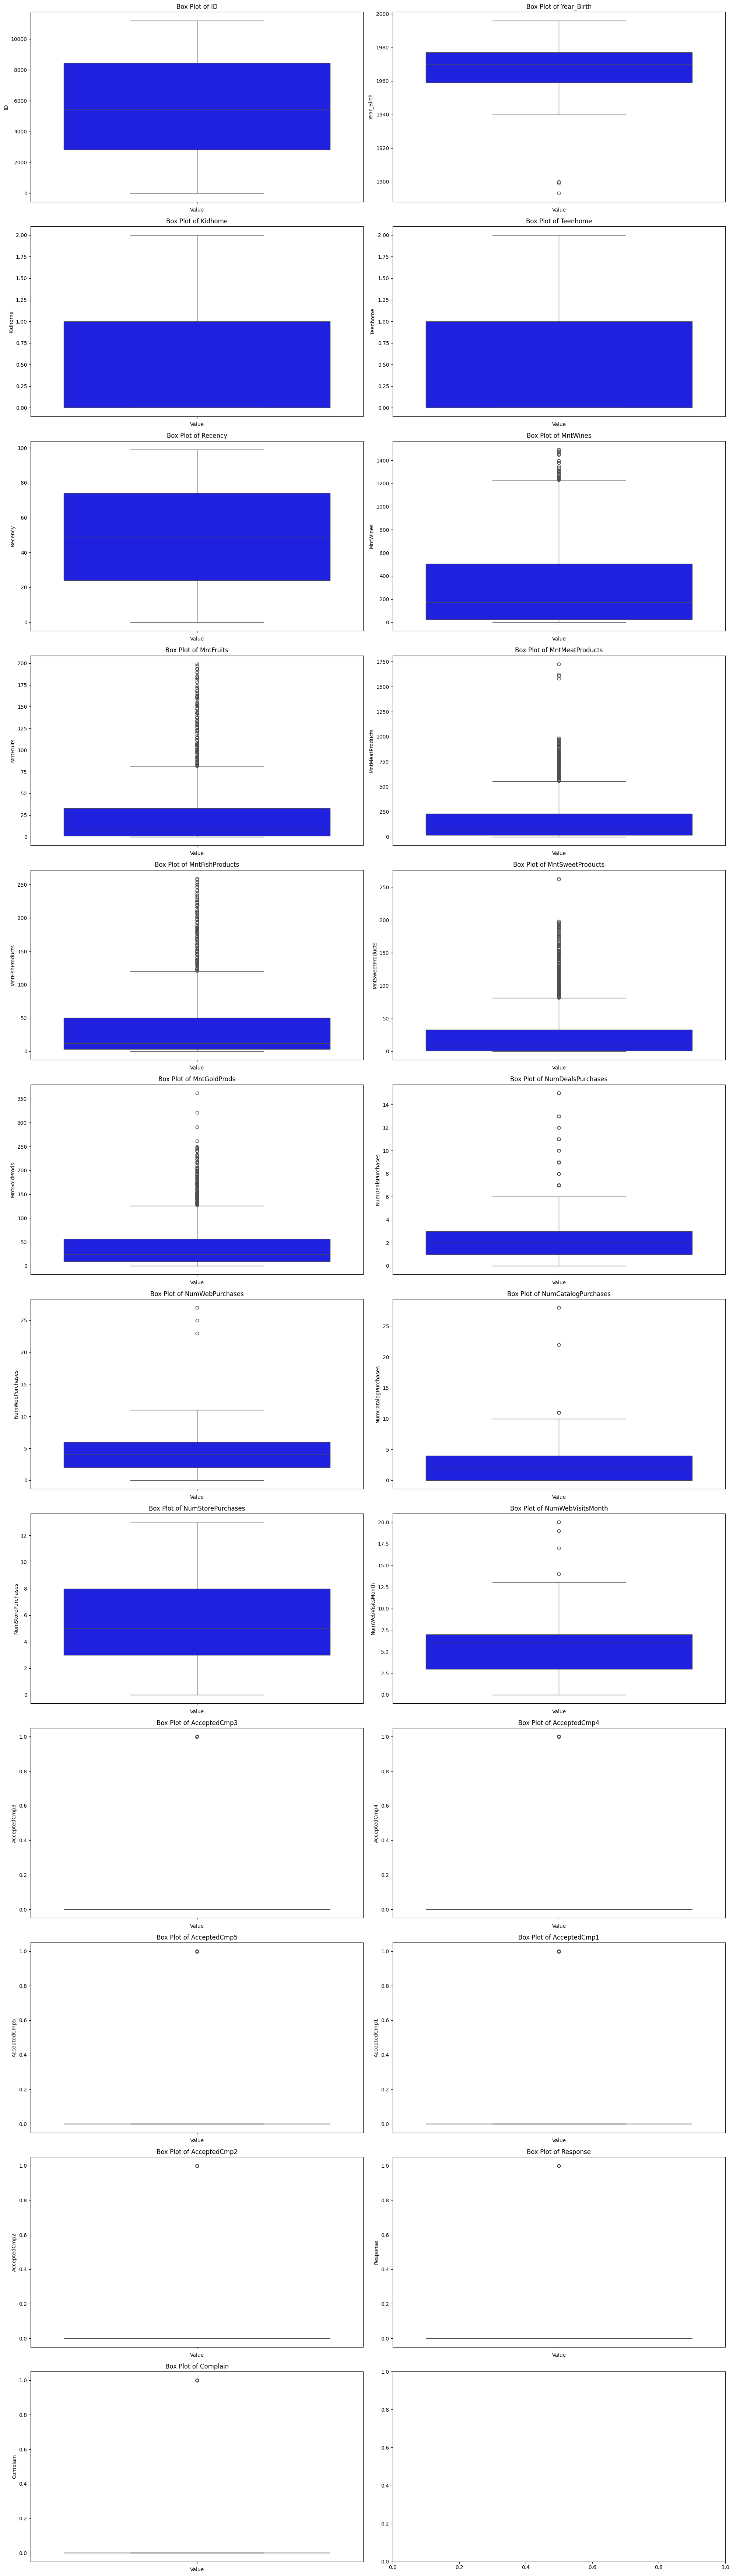

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt

# Set the palette
sns.set_palette('pastel')

# Select only integer columns
integer_features = df.select_dtypes(include=['int64']).columns

# Create a figure with multiple subplots
fig, axs = plt.subplots(len(integer_features) // 2 + 1, 2, figsize=(20, 70))

# Plot box plots for integer features
for i, feature in enumerate(integer_features):
    row = i // 2
    col = i % 2
    sns.boxplot(df[feature], ax=axs[row, col], color='blue')
    axs[row, col].set_title(f'Box Plot of {feature}')
    axs[row, col].set_xlabel('Value')

# Layout so plots do not overlap
fig.tight_layout()

# Save the figure to a file
plt.savefig('box_plots.png')

# Show the plot
plt.show()


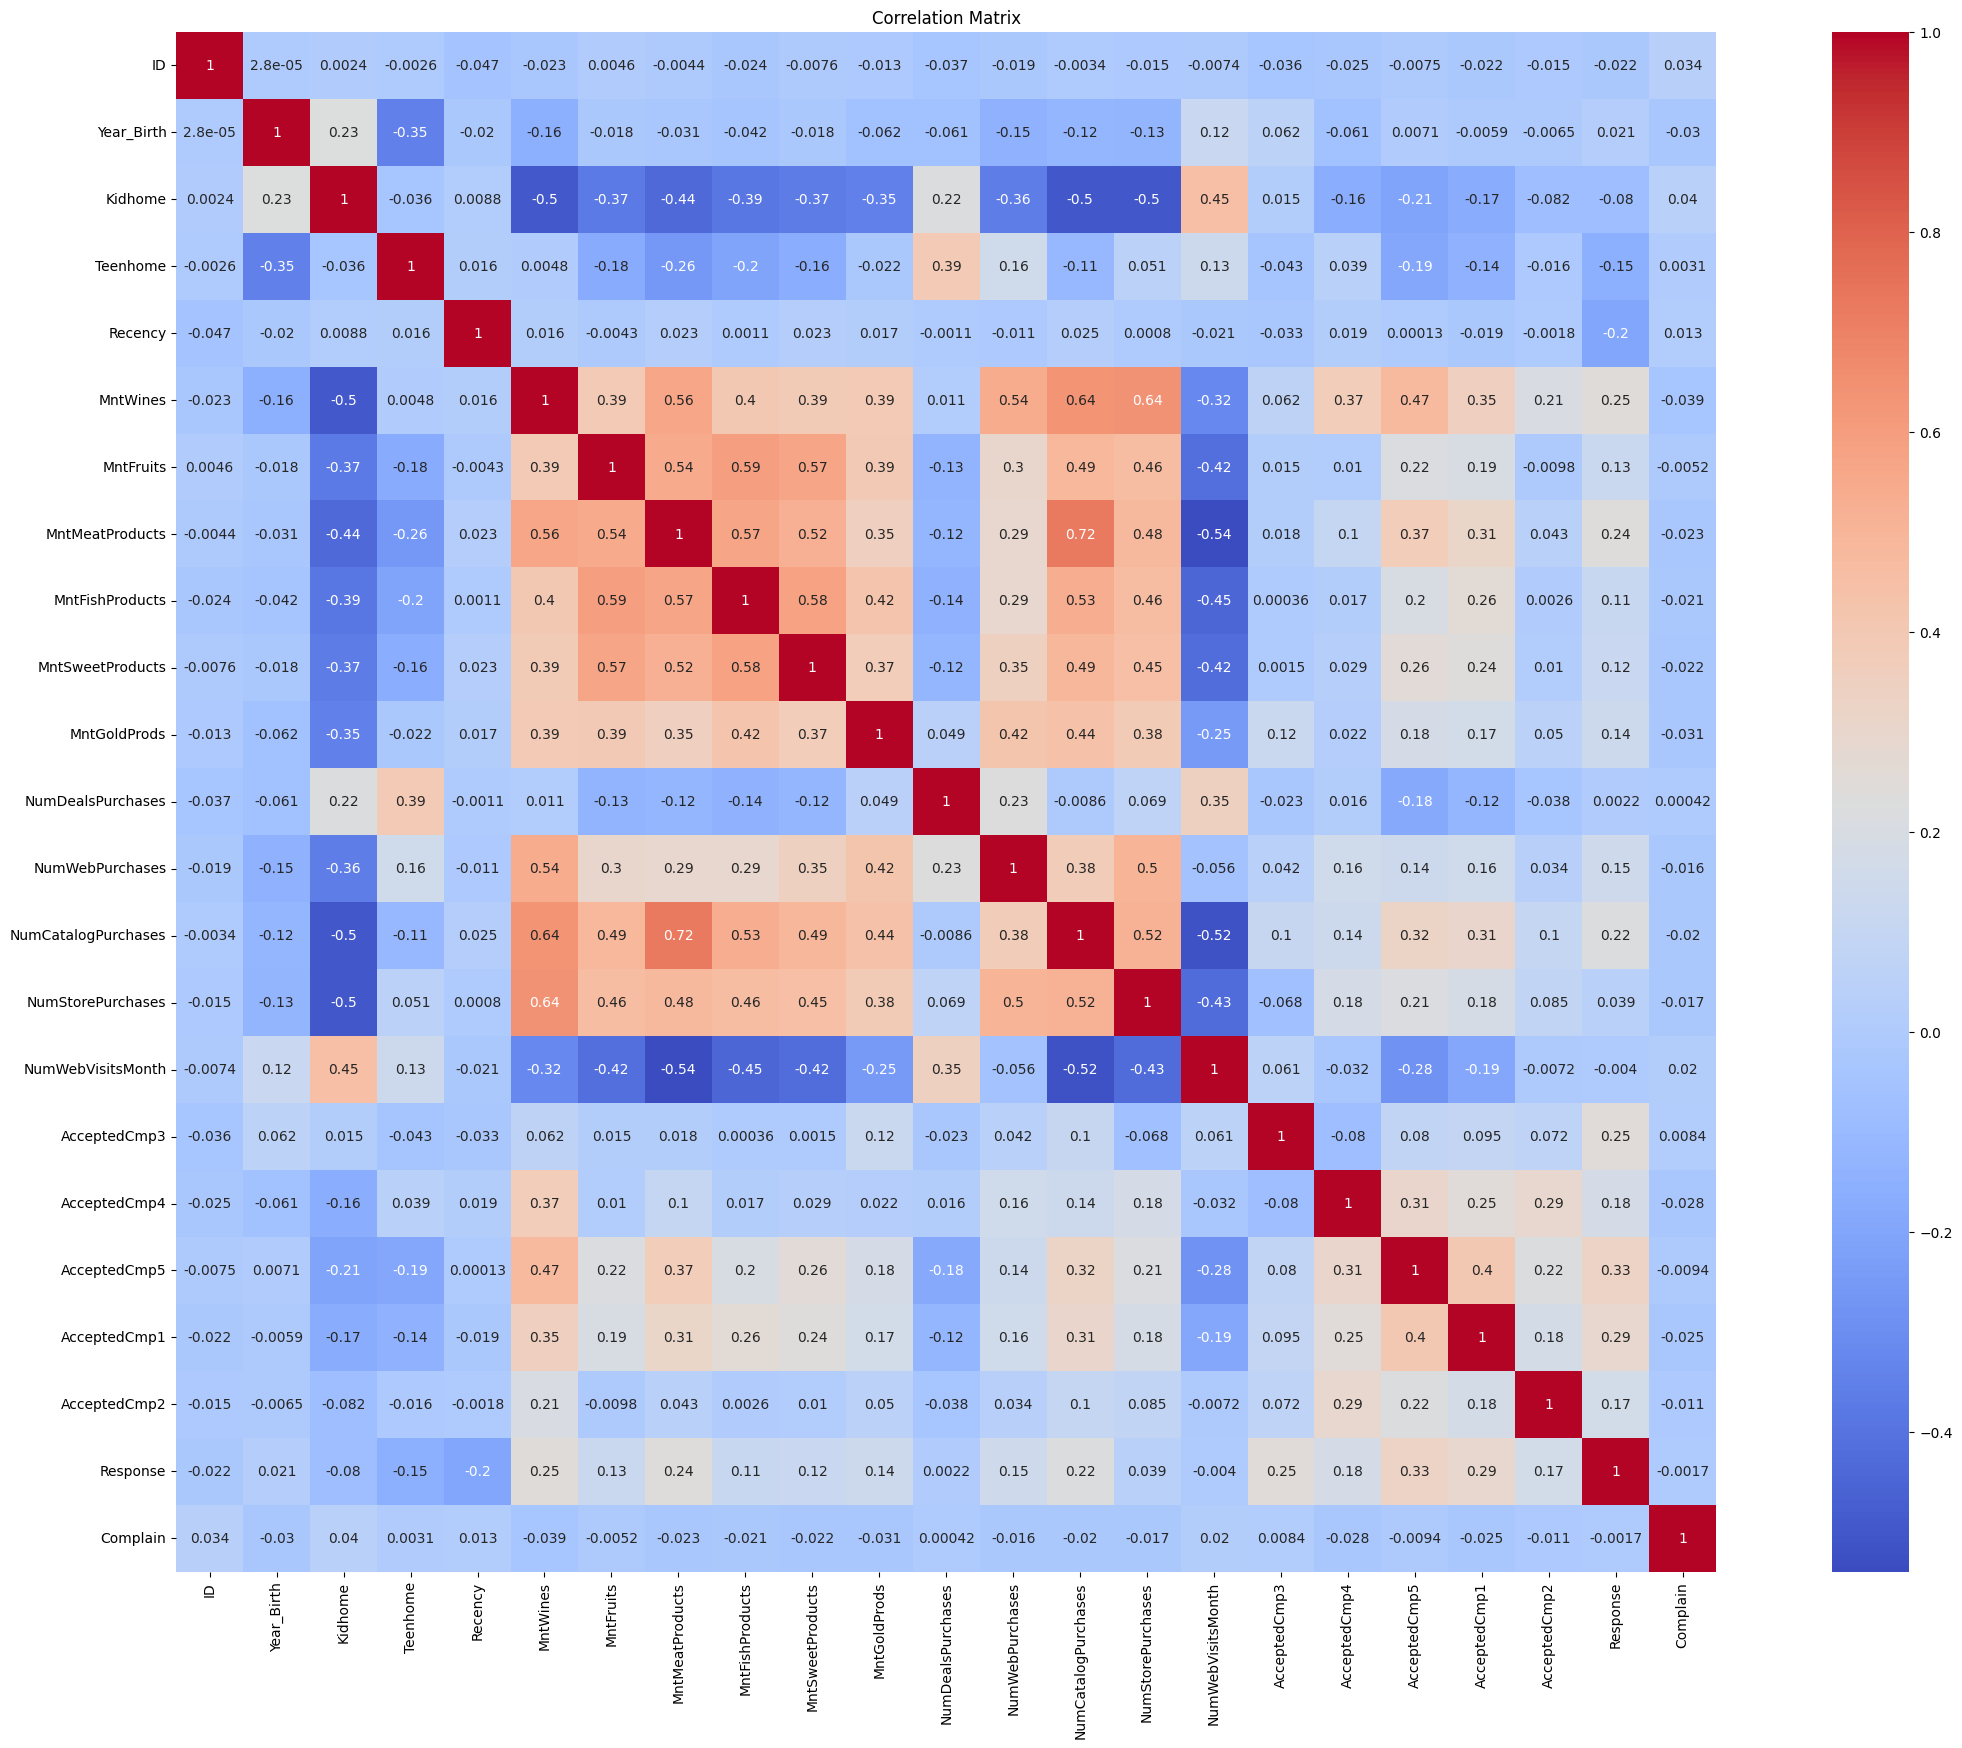

In [13]:

correlation = df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(30, 20))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

There is not any constant columns to be dropped 

In [14]:

categorical_features = df.select_dtypes(include=['object'])
for col in categorical_features:
    print(f"Column: {col}, Unique Values: {df[col].nunique()}")


Column: Education, Unique Values: 5
Column: Marital_Status, Unique Values: 8
Column: Income, Unique Values: 1974
Column: Dt_Customer, Unique Values: 663
Column: Country, Unique Values: 8


In [15]:
x=categorical_features
def has_decimal(x): return '.' in round(x)

## Summary Statistics
- Data set has  2240 rows and 28 columns 
- 23 columns are  integers  and 5 are objects  datatyp
- There are no duplicate values in dataset 

#### Numerical Attributes :
- Missing values: income   has 24 missing values that required to be computed by removing or replacing with mean or mod value. 
Type transformation income  requires type transformation 
Feature  extraction
- year_birth  dt_customer: are required for feature  extraction as  day ,month and years  
outliers: 'Year_Birth',   'NumWebVisitsMonth'and 'NumCatalogPurchases' have outliers 
Feature engineering: 
- Mnt(product) and purchases(purchases) are spread in wide range required to be normalized   
#### Categorical  Attributes :  

- Feature encoding :
Education: there are  5 unique categories required to be   encoded in  , one-hot encoding.
- Marital_Status: there are  5 unique categories  feature like 'Alone', 'Absurd', and 'YOLO'. These might need to be grouped or encoded.  
- Binary attributes :  
AcceptedCmp1-5, Response, Complain: are  in a binary format doesn't require modification can be further encoded 
according to model requirments.
       - Kidhome , Teenhome  columns can be grouped as a fmaily 




## 1: Data Analysis and Preprocessing

Dropping missing values  

In [16]:
df_cleaned=df.dropna(subset=['Income'])



Type transformation and removing $

In [17]:


df_cleaned['Income'] = df_cleaned['Income'].str.replace('$', '').str.replace(',', '').astype(float)
df_cleaned['Income'] 

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2216, dtype: float64

##### imputing outlier 

In [18]:

# Define columns to check for outliers
columns = ['Year_Birth',   'NumWebVisitsMonth', 'NumCatalogPurchases']

# Iterate over each column
for column in columns:
    # Calculate summary statistics
    col_stats = df_cleaned[column].describe()
    
    # Extract Q1 and Q3
    Q1 = col_stats['25%']
    Q3 = col_stats['75%']
    
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Calculate lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Count outliers
    outlier_count = outliers.shape[0]
    
    # Print results
    print(f"Column: {column}")
    print(f"Lower bound: {lower_bound}")
    print(f"Upper bound: {upper_bound}")
    print(f"Outlier count: {outlier_count}")
    print(outliers[column].sort_values().unique())
    print()

Column: Year_Birth
Lower bound: 1932.0
Upper bound: 2004.0
Outlier count: 3
[1893 1899 1900]

Column: NumWebVisitsMonth
Lower bound: -3.0
Upper bound: 13.0
Outlier count: 8
[14 17 19 20]

Column: NumCatalogPurchases
Lower bound: -6.0
Upper bound: 10.0
Outlier count: 23
[11 22 28]



In [19]:
df_cleaned = df_cleaned[~df_cleaned['Year_Birth'].isin([1893, 1899, 1900])]
df_cleaned = df_cleaned[~df_cleaned['NumWebVisitsMonth'].isin([14, 17, 19, 20])]
df_cleaned = df_cleaned[~df_cleaned['NumCatalogPurchases'].isin([11, 22, 28])]

Imputing Birth_year 

In [20]:
df_cleaned['Year_Birth'] = pd.to_datetime(df_cleaned['Year_Birth'], format='%Y')

###### Type transformation to date 

### Imputing  numerical features 

In [114]:
# Variable Revenue_generated as the total sum of the amount spent on the 6 product categories
df_cleaned['Revenue_generated'] = df_cleaned.filter(like='Mnt', axis=1).sum(axis=1)

In [49]:
df_cleaned['Total_Purchases'] = df_cleaned.filter(like='Purchases', axis=1).sum(axis=1)

In [23]:
df_cleaned['TotalAmount_Spent'] = df_cleaned.filter(like='Mnt', axis=1).sum(axis=1)


In [24]:
df_cleaned.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Revenue_generated',
       'Total_Purchases', 'TotalAmount_Spent'],
      dtype='object')

### Imputing Categorical features 

In [25]:
df_cleaned['Marital_Status'].value_counts()

Marital_Status
Married     846
Together    565
Single      462
Divorced    228
Widow        74
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

Alone ,YOLO  and Absurd  are in least in count 

In [26]:
df_cleaned = df_cleaned[~df_cleaned['Marital_Status'].isin(['Alone', 'YOLO', 'Absurd'])]


In [27]:
df_cleaned['Marital_Status'].value_counts()

Marital_Status
Married     846
Together    565
Single      462
Divorced    228
Widow        74
Name: count, dtype: int64

### Imputing Date Feature: Dt_Customer

In [28]:

# Convert Dt_Customer column to datetime format
df_cleaned['Dt_Customer'] = pd.to_datetime(df_cleaned['Dt_Customer'], format='%m/%d/%y')

# Finding the earliest and latest date in the Dt_Customer column
earliest_date = df_cleaned['Dt_Customer'].min()
latest_date = df_cleaned['Dt_Customer'].max()

# Calculating customer tenure as days from Dt_Customer to the current date
current_date = datetime.now()
df_cleaned['Customer_Tenure_Days'] = (current_date - df_cleaned['Dt_Customer']).dt.days

# Displaying the earliest and latest date, and the first few rows to see the new column
earliest_date, latest_date, df_cleaned[['Dt_Customer', 'Customer_Tenure_Days']].head()

(Timestamp('2012-07-30 00:00:00'),
 Timestamp('2014-06-29 00:00:00'),
   Dt_Customer  Customer_Tenure_Days
 0  2014-06-16                  3739
 1  2014-06-15                  3740
 2  2014-05-13                  3773
 3  2014-05-11                  3775
 4  2014-04-08                  3808)

### Feature engineering.


Label Encoding 

In [29]:
marital_status_encoded = pd.get_dummies( df_cleaned['Marital_Status'], prefix='Marital')
df_encoded = df.join(marital_status_encoded)

In [30]:
education_hierarchy = {'Basic': 1, 'Graduation': 2, '2n Cycle': 3, 'Master': 4, 'PhD': 5}
df_encoded['Education_Encoded'] = df_encoded['Education'].map(education_hierarchy)

In [31]:
Country_encoded = pd.get_dummies(df['Country'], prefix='Country_')
df_encoded = df.join(Country_encoded)

Feature Transformation

In [32]:
df_encoded['Customer_Dormancy']=df_cleaned['Customer_Tenure_Days']-df_cleaned['Recency']


subtracting  Customer_Tenure_Days from Recency thats will indicated to get Customer_Dormancy or inactive days

In [33]:
from datetime import date

# Calculate age
df_encoded['Age'] = date.today().year - df_encoded['Year_Birth']

creating  age column 

In [34]:
df_encoded['Income']=df_cleaned['Income']
df_encoded


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Country__AUS,Country__CA,Country__GER,Country__IND,Country__ME,Country__SA,Country__SP,Country__US,Customer_Dormancy,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,False,False,False,False,False,False,True,False,3739.0,54
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,False,True,False,False,False,False,False,False,3740.0,63
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,False,False,False,False,False,False,False,True,3773.0,66
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,...,True,False,False,False,False,False,False,False,3775.0,57
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,...,False,False,False,False,False,False,True,False,3808.0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,3/7/13,99,372,...,False,False,False,False,False,False,False,True,4106.0,48
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,False,False,False,False,False,False,True,False,4150.0,47
2237,22,1976,Graduation,Divorced,46310.0,1,0,12/3/12,99,185,...,False,False,False,False,False,False,True,False,4200.0,48
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,False,False,False,True,False,False,False,False,4204.0,46


### Dropping features after encoding 

In [35]:
df_encoded = df_encoded.drop(['Education', 'Marital_Status', 'Dt_Customer', 'Recency','Year_Birth'], axis=1)

### Adding transformed features 

In [36]:
df_encoded = df_encoded.assign(
    Revenue_generated=df_cleaned['Revenue_generated'],
    Total_Purchases=df_cleaned['Total_Purchases'],
    TotalAmount_Spent=df_cleaned['TotalAmount_Spent']
)

In [37]:
df_encoded.columns

Index(['ID', 'Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Country__AUS',
       'Country__CA', 'Country__GER', 'Country__IND', 'Country__ME',
       'Country__SA', 'Country__SP', 'Country__US', 'Customer_Dormancy', 'Age',
       'Revenue_generated', 'Total_Purchases', 'TotalAmount_Spent'],
      dtype='object')

## 2: Exploratory Data Analysis (EDA)

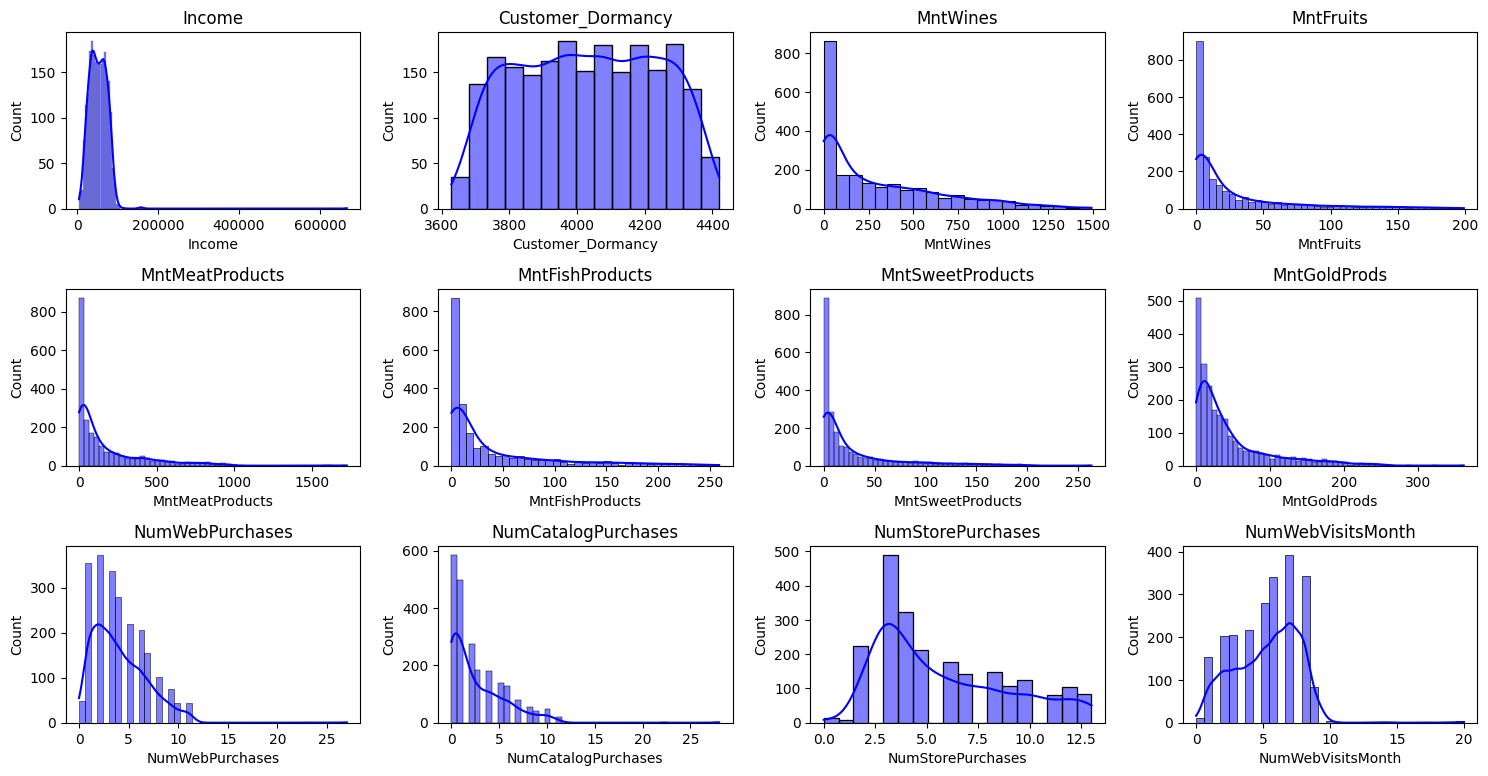

In [38]:
# Columns to be visualized
columns_to_visualize = ['Income', 'Customer_Dormancy', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                        'NumWebVisitsMonth']
# Plotting distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_visualize):
    plt.subplot(4, 4, i+1)
    sns.histplot(df_encoded[col], kde=True, color='blue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [39]:
df_encoded

,ID,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Country__IND,Country__ME,Country__SA,Country__SP,Country__US,Customer_Dormancy,Age,Revenue_generated,Total_Purchases,TotalAmount_Spent
0,1826,84835.0,0,0,189,104,379,111,189,218,...,False,False,False,True,False,3739.0,54,1190.0,15.0,1190.0
1,1,57091.0,0,0,464,5,64,7,0,37,...,False,False,False,False,False,3740.0,63,577.0,18.0,577.0
2,10476,67267.0,0,1,134,11,59,15,2,30,...,False,False,False,False,True,3773.0,66,251.0,11.0,251.0
3,1386,32474.0,1,1,10,0,1,0,0,0,...,False,False,False,False,False,3775.0,57,11.0,4.0,11.0
4,5371,21474.0,1,0,6,16,24,11,0,34,...,False,False,False,True,False,3808.0,35,91.0,8.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,66476.0,0,1,372,18,126,47,48,78,...,False,False,False,False,True,4106.0,48,689.0,20.0,689.0
2236,5263,31056.0,1,0,5,10,13,3,8,16,...,False,False,False,True,False,4150.0,47,55.0,5.0,55.0
2237,22,46310.0,1,0,185,2,88,15,5,14,...,False,False,False,True,False,4200.0,48,309.0,14.0,309.0
2238,528,65819.0,0,0,267,38,701,149,165,63,...,True,False,False,False,False,4204.0,46,1383.0,20.0,1383.0


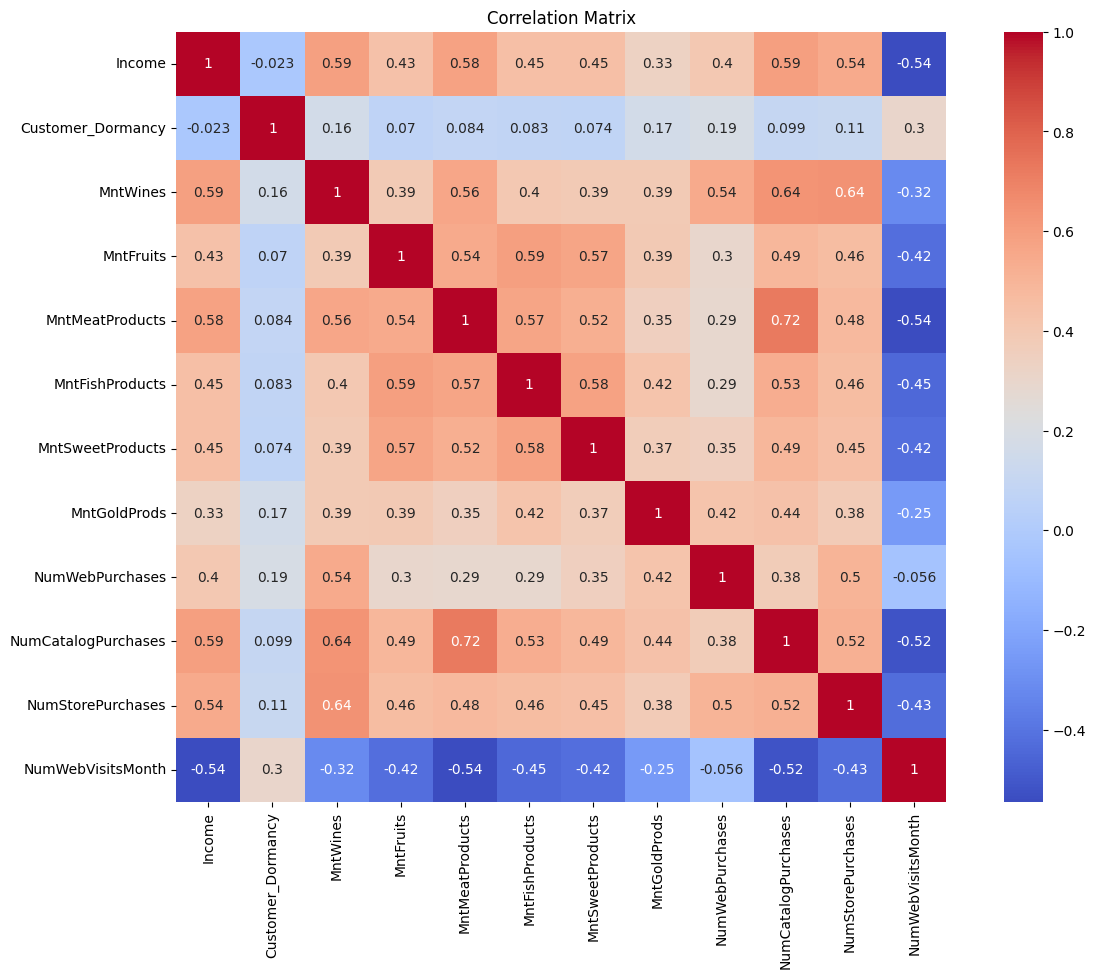

In [40]:
# Calculate the correlation matrix
correlation_matrix = df_encoded[columns_to_visualize].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


In [41]:
df_encoded.columns

Index(['ID', 'Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Country__AUS',
       'Country__CA', 'Country__GER', 'Country__IND', 'Country__ME',
       'Country__SA', 'Country__SP', 'Country__US', 'Customer_Dormancy', 'Age',
       'Revenue_generated', 'Total_Purchases', 'TotalAmount_Spent'],
      dtype='object')

### Revenue  by campaign 

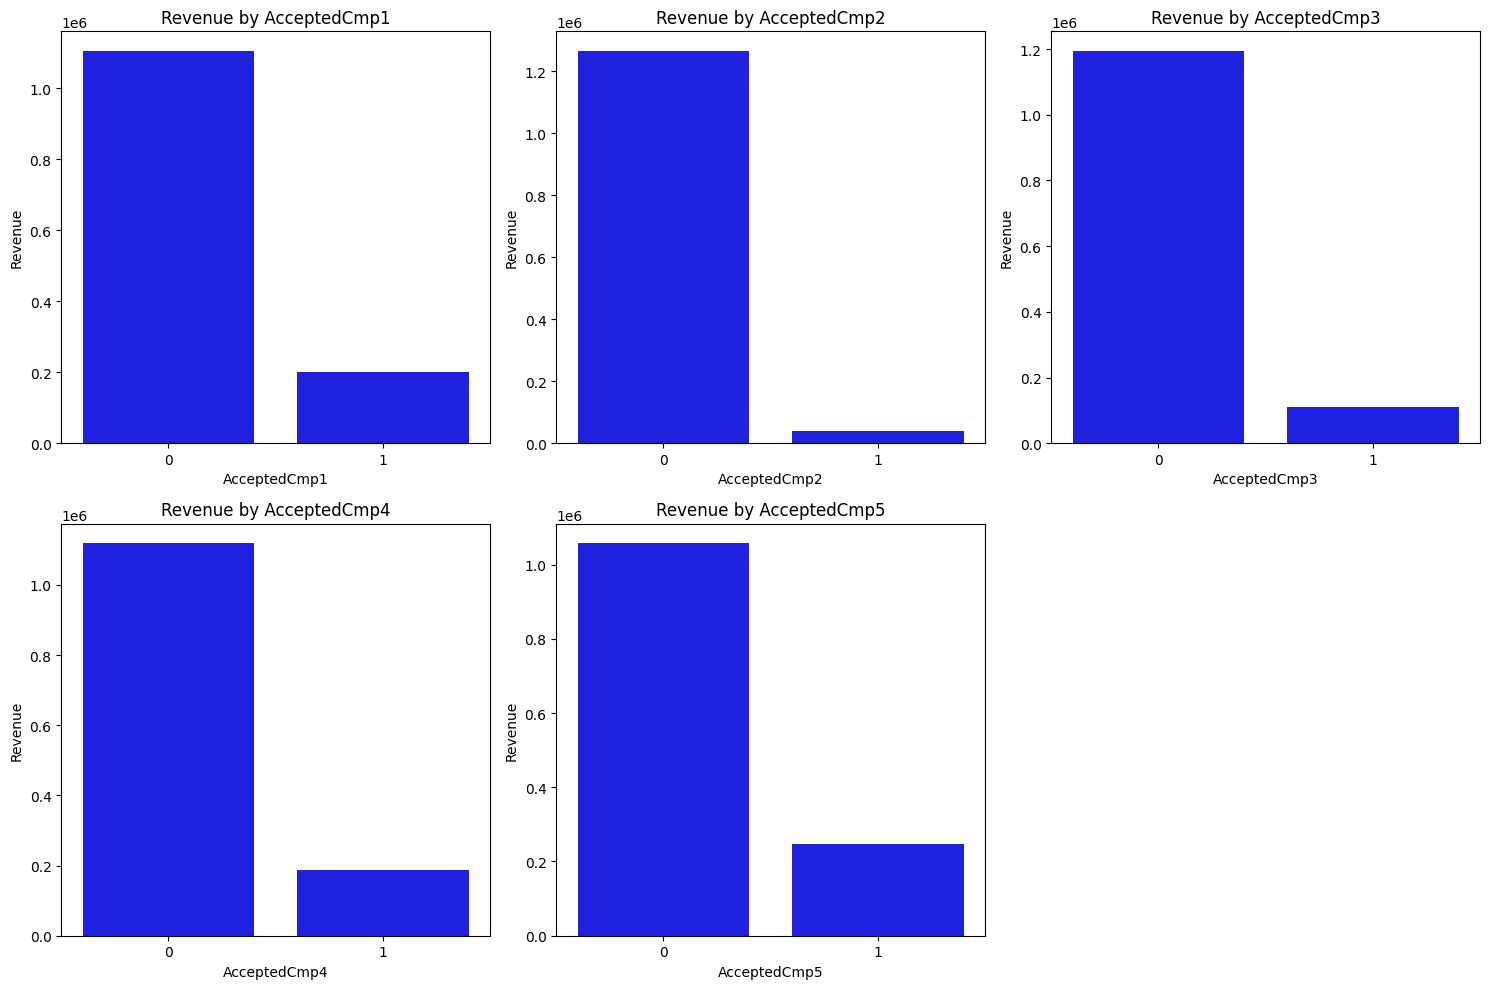

In [54]:
# 1:Which marketing campaign is most successful?
plt.figure(figsize=(15, 10))
for i, campaign in enumerate(campaigns):
    plt.subplot(2, 3, i+1)
    campaign_sales = df_encoded.groupby(campaign)['Revenue_generated'].sum().reset_index()
    sns.barplot(x=campaign_sales[campaign], y=campaign_sales['Revenue_generated'], color='blue')
    plt.title(f'Revenue by {campaign}')
    plt.xlabel(campaign)
    plt.ylabel('Revenue')
    plt.tight_layout()

In [ ]:


campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

max_sales = 0
max_campaign = ""

for campaign in campaigns:
    campaign_sales = df_encoded[df_encoded[campaign] == 1]['Revenue_generated'].sum()
    print(f"Revenue for {campaign}: {campaign_sales}")
    print("------------------------")
    
    # Find the campaign with the maximum Revenue
    if campaign_sales > max_sales:
        max_sales = campaign_sales
        max_campaign = campaign

print(f"The campaign with the maximum Revenue  is: {max_campaign} with {max_sales} revenue")


Revenue for AcceptedCmp1: 200157.0
------------------------
Revenue for AcceptedCmp2: 39230.0
------------------------
Revenue for AcceptedCmp3: 110382.0
------------------------
Revenue for AcceptedCmp4: 186560.0
------------------------
Revenue for AcceptedCmp5: 247845.0
------------------------
The campaign with the maximum Revenue  is: AcceptedCmp5 with 247845.0 revenue


campaign 5 is most successful by generating hightest revenue   

### Total Purchase by campaign 

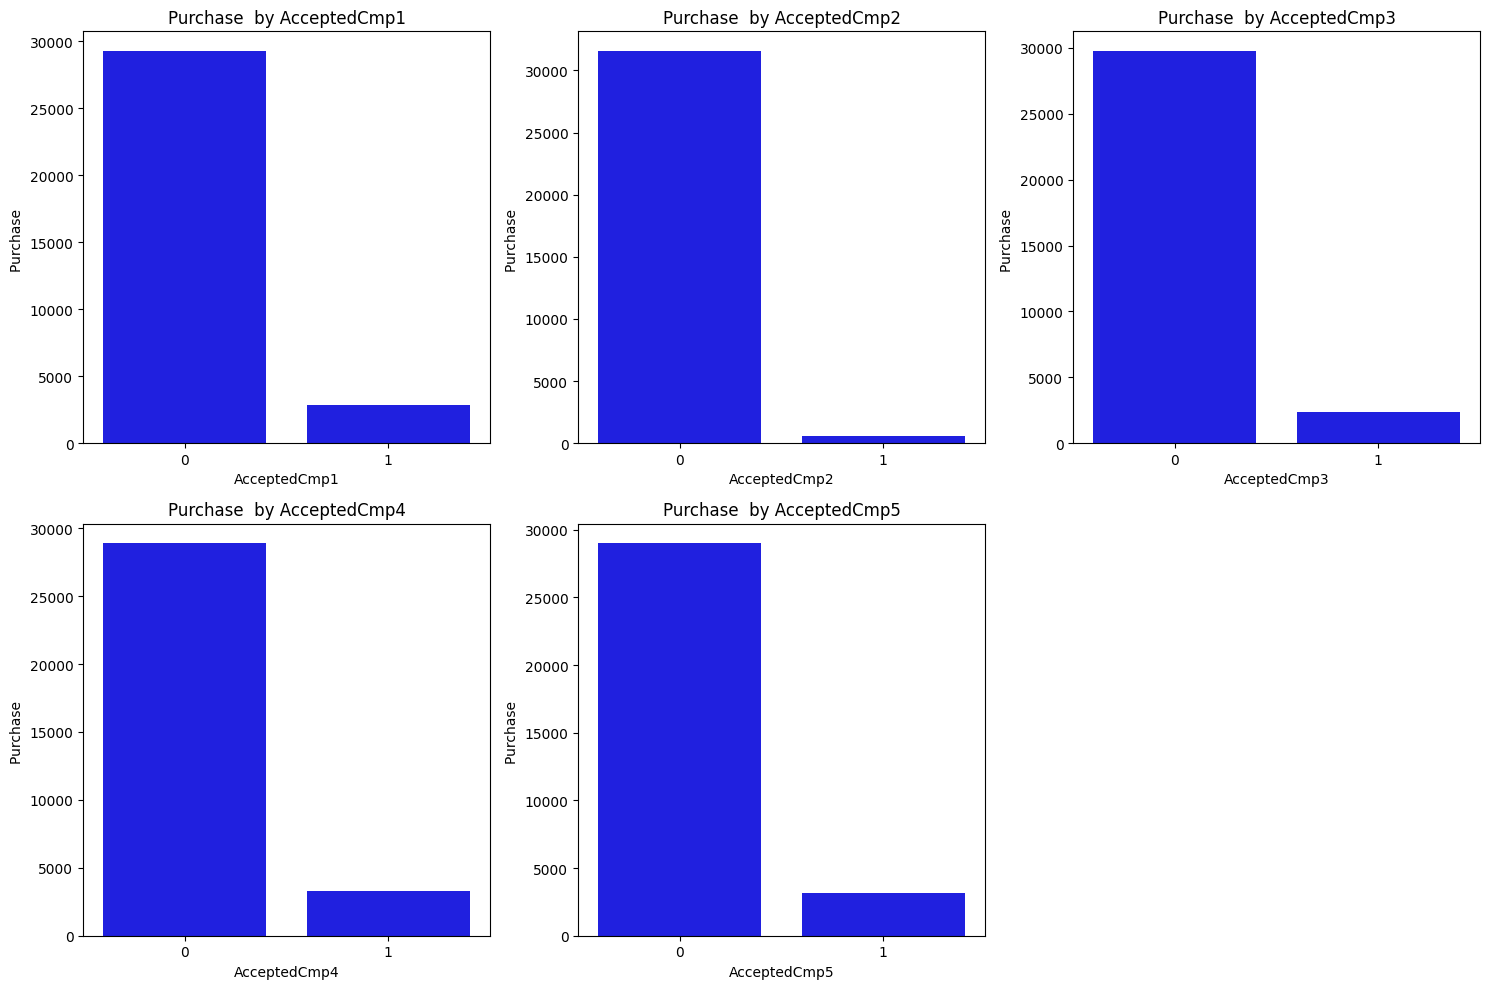

In [56]:
plt.figure(figsize=(15, 10))
for i, campaign in enumerate(campaigns):
    plt.subplot(2, 3, i+1)
    campaign_sales = df_encoded.groupby(campaign)['Total_Purchases'].sum().reset_index()
    sns.barplot(x=campaign_sales[campaign], y=campaign_sales['Total_Purchases'], color='blue')
    plt.title(f'Purchase  by {campaign}')
    plt.xlabel(campaign)
    plt.ylabel('Purchase ')
    plt.tight_layout()

In [53]:
#total purchase 

campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

max_purchase = 0
max_campaign = ""

for campaign in campaigns:
    campaign_purchase = df_encoded[df_encoded[campaign] == 1]['Total_Purchases'] .sum()
    print(f"Revenue for {campaign}: {campaign_purchase}")
    print("------------------------")
    
    # Find the campaign with the maximum Revenue
    if campaign_purchase > max_purchase:
        max_purchase = campaign_purchase
        max_campaign = campaign

print(f"The campaign with the maximum purchase   is: {max_campaign} with {max_purchase} purchase ")


Revenue for AcceptedCmp1: 2884.0
------------------------
Revenue for AcceptedCmp2: 598.0
------------------------
Revenue for AcceptedCmp3: 2403.0
------------------------
Revenue for AcceptedCmp4: 3291.0
------------------------
Revenue for AcceptedCmp5: 3191.0
------------------------
The campaign with the maximum purchase   is: AcceptedCmp4 with 3291.0 purchase 


### Customer  by campaign 

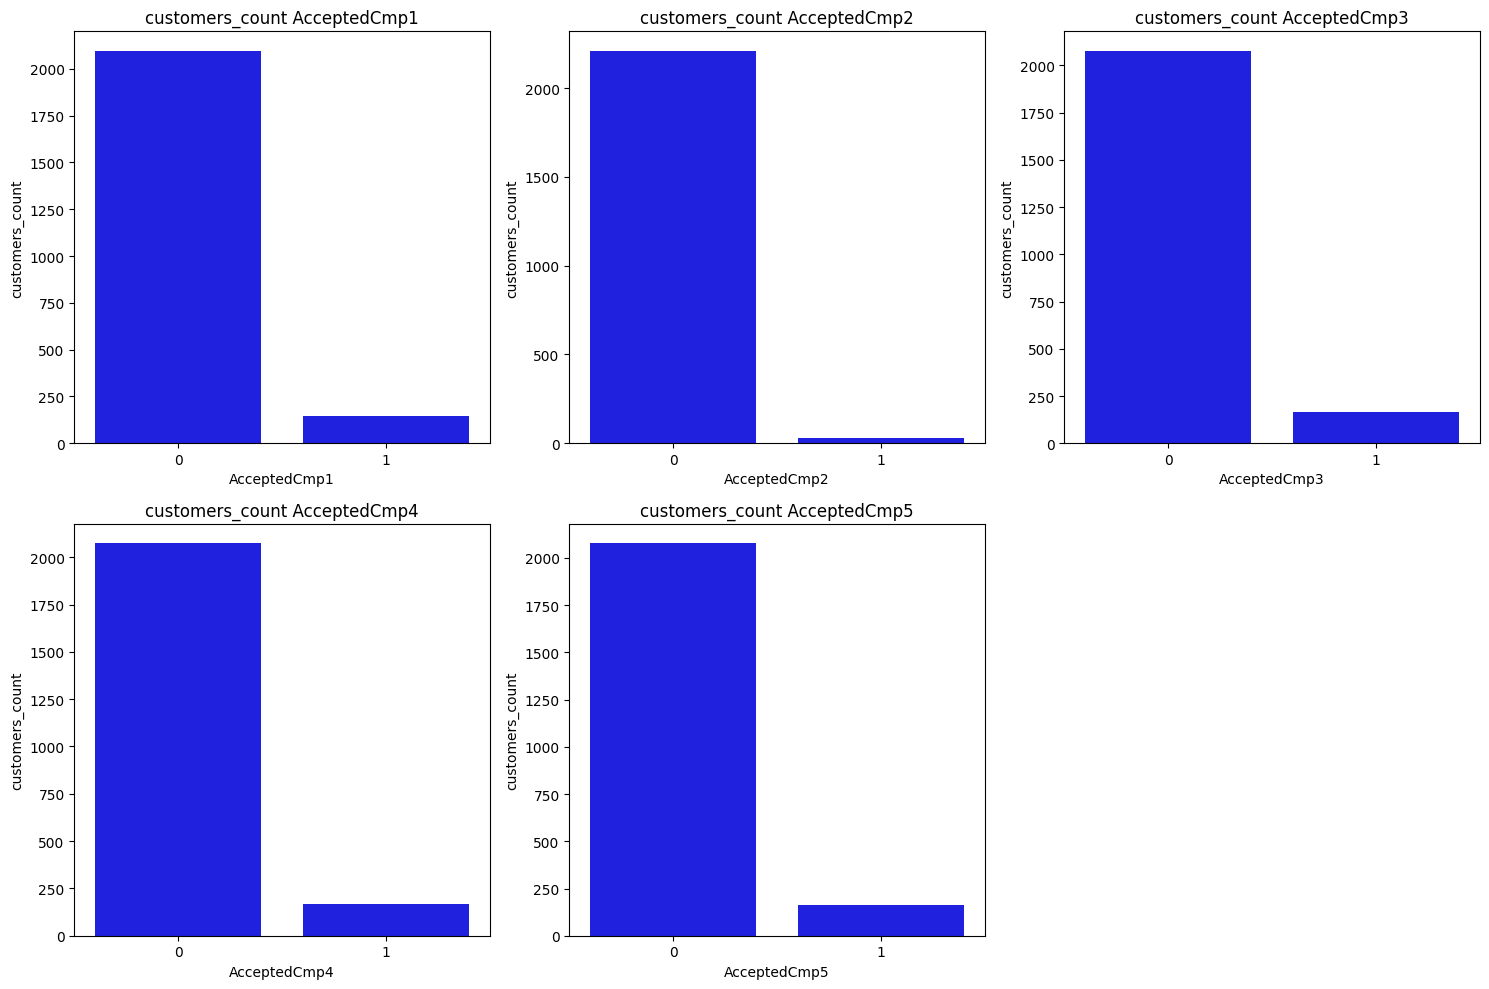

In [ ]:
plt.figure(figsize=(15, 10))
for i, campaign in enumerate(campaigns):
    plt.subplot(2, 3, i+1)
    campaign_sales = df_encoded.groupby(campaign)['ID'].count().reset_index()
    sns.barplot(x=campaign_sales[campaign], y=campaign_sales['ID'], color='blue')
    plt.title(f'customers_count {campaign}')
    plt.xlabel(campaign)
    plt.ylabel('customers_count')
    plt.tight_layout()

In [ ]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

max_sales = 0
max_campaign = ""

for campaign in campaigns:
    customer_count = df_encoded[df_encoded[campaign] == 1]['ID'].count()
    print(f"customer count for {campaign}: {customer_count}")
    print("------------------------")
    
    # Find the campaign with the maximum customer count
    if customer_count > max_sales:
        max_sales = customer_count
        max_campaign = campaign

print(f"The campaign with the maximum customer count  is: {max_campaign} with {max_sales} customer count")


customer count for AcceptedCmp1: 144
------------------------
customer count for AcceptedCmp2: 30
------------------------
customer count for AcceptedCmp3: 163
------------------------
customer count for AcceptedCmp4: 167
------------------------
customer count for AcceptedCmp5: 163
------------------------
The campaign with the maximum customer count  is: AcceptedCmp4 with 167 customer count


### Customer_Dormancy by campaign 

Customer_Dormancy for AcceptedCmp1: 543649.0
------------------------
Customer_Dormancy for AcceptedCmp2: 121243.0
------------------------
Customer_Dormancy for AcceptedCmp3: 633042.0
------------------------
Customer_Dormancy for AcceptedCmp4: 662583.0
------------------------
Customer_Dormancy for AcceptedCmp5: 619676.0
------------------------


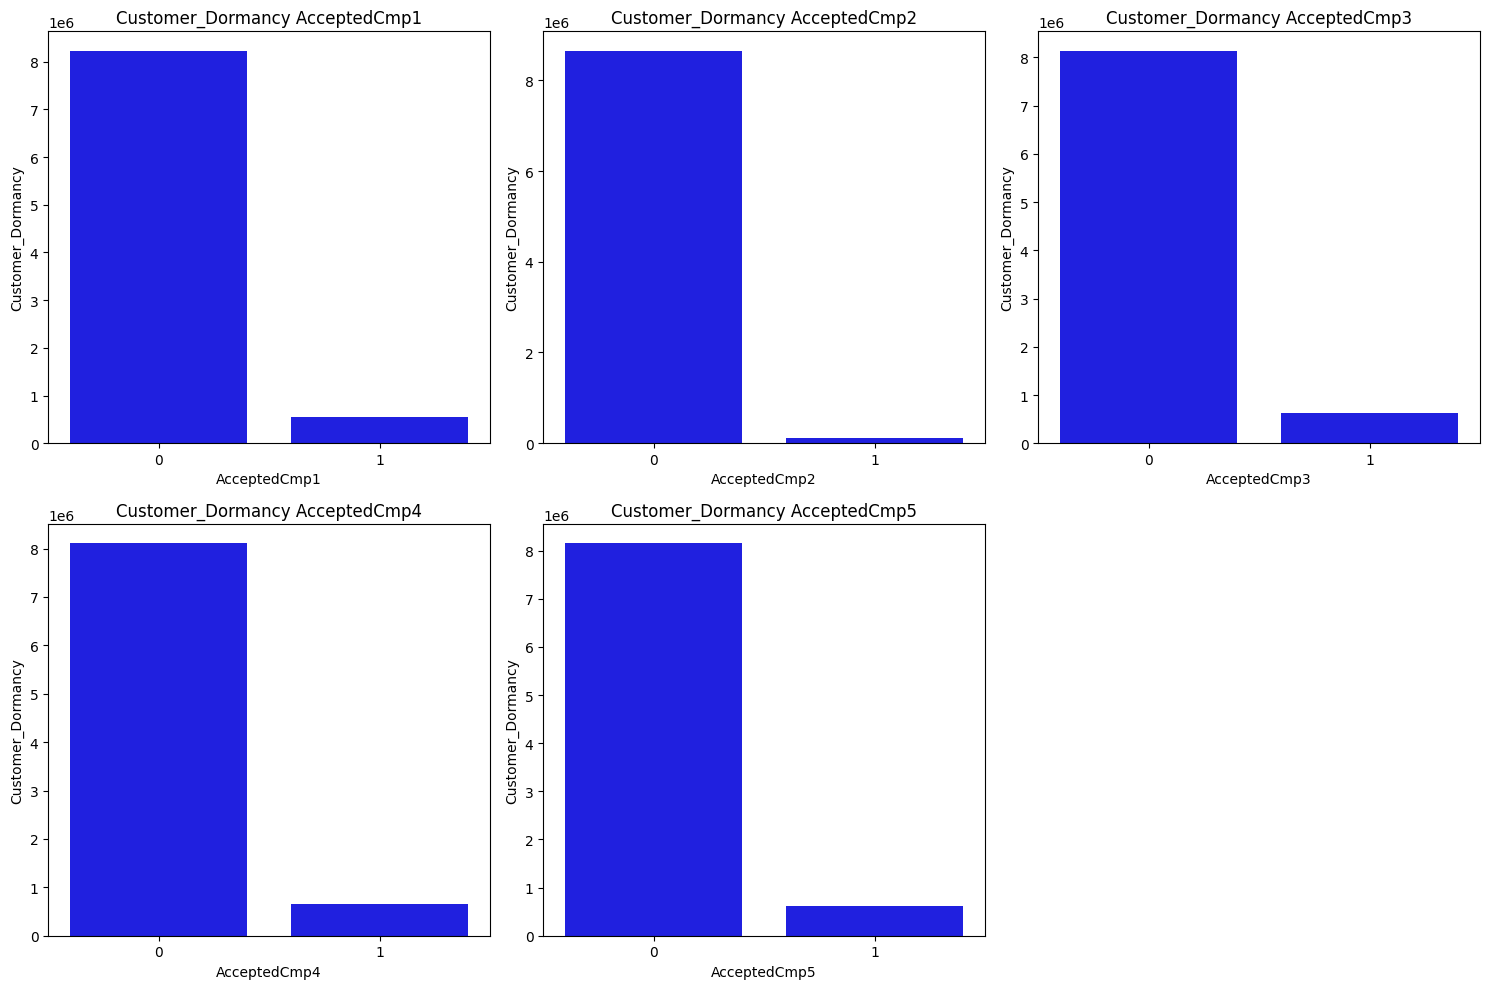

In [ ]:
plt.figure(figsize=(15, 10))
for i, campaign in enumerate(campaigns):
    plt.subplot(2, 3, i+1)
    campaign_sales = df_encoded.groupby(campaign)['Customer_Dormancy'].sum().reset_index()
    sns.barplot(x=campaign_sales[campaign], y=campaign_sales['Customer_Dormancy'], color='blue')
    plt.title(f'Customer_Dormancy {campaign}')
    plt.xlabel(campaign)
    plt.ylabel('Customer_Dormancy')
    plt.tight_layout()

for campaign in campaigns:
    Customer_Dormancy = df_encoded[df_encoded[campaign] == 1]['Customer_Dormancy'].sum()
    print(f"Customer_Dormancy for {campaign}: {Customer_Dormancy}")
    print("------------------------")



In [ ]:
df_encoded.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Marital_Divorced',
       'Marital_Married', 'Marital_Single', 'Marital_Together',
       'Marital_Widow'],
      dtype='object')

Campign 2 has most loyal customers and active customers 

TotalAmount_Spentfor MntWines: 1304829.0
------------------------
TotalAmount_Spentfor MntFruits: 1304829.0
------------------------
TotalAmount_Spentfor MntMeatProducts: 1304829.0
------------------------
TotalAmount_Spentfor MntFishProducts: 1304829.0
------------------------
TotalAmount_Spentfor MntSweetProducts: 1304829.0
------------------------
TotalAmount_Spentfor MntGoldProds: 1304829.0
------------------------


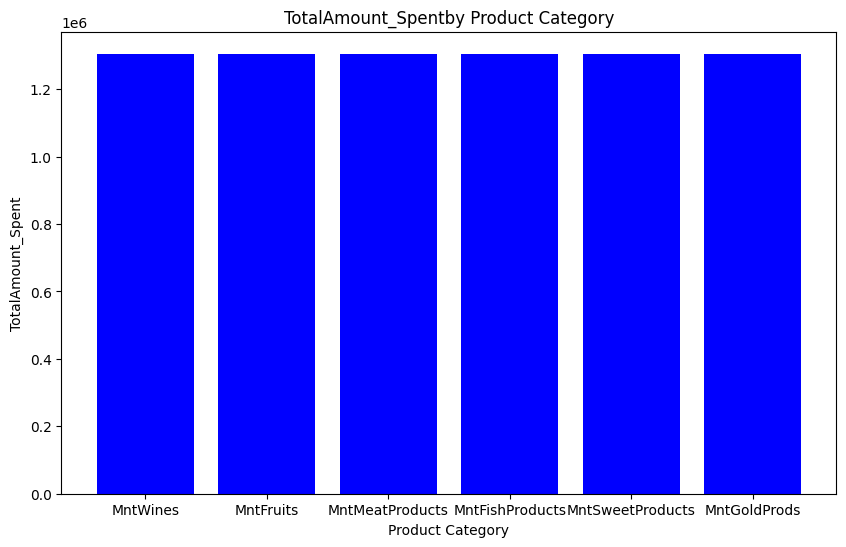

In [46]:
# 2:Display the total amount spent by a customer in each product category.
# 4. Which products are performing best, and which are performing the least in terms of
# TotalAmount_Spent Analyze the data and plot a suitable graph to display a report on TotalAmount_Spent# generated by different products.
products = ['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
TotalAmount_Spent = []

for product in products:
    product_sales = df_encoded.loc[:, 'TotalAmount_Spent'].sum()
    TotalAmount_Spent.append(product_sales)
    print(f"TotalAmount_Spentfor {product}: {product_sales}")
    print("------------------------")

plt.figure(figsize=(10, 6))
plt.bar(products, TotalAmount_Spent, color='blue')
plt.xlabel('Product Category')
plt.ylabel('TotalAmount_Spent')
plt.title('TotalAmount_Spentby Product Category')
plt.show()


Revenue for MntWines: 1304829.0
------------------------
Revenue for MntFruits: 1304829.0
------------------------
Revenue for MntMeatProducts: 1304829.0
------------------------
Revenue for MntFishProducts: 1304829.0
------------------------
Revenue for MntSweetProducts: 1304829.0
------------------------
Revenue for MntGoldProds: 1304829.0
------------------------


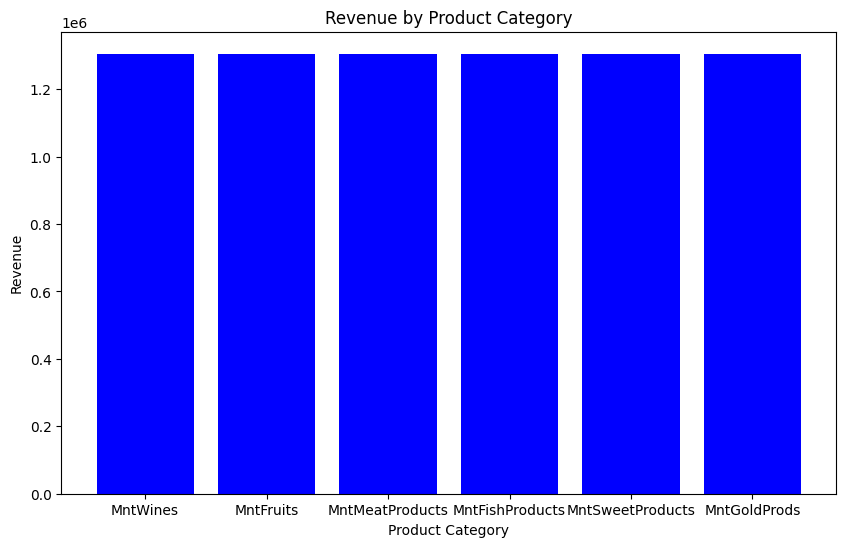

In [45]:
# 4. Which products are performing best, and which are performing the least in terms of
# revenue? Analyze the data and plot a suitable graph to display a report on revenue
# generated by different products.
products = ['MntWines','MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
revenues = []

for product in products:
    product_sales = df_encoded.loc[:, 'Revenue_generated'].sum()
    revenues.append(product_sales)
    print(f"Revenue for {product}: {product_sales}")
    print("------------------------")

plt.figure(figsize=(10, 6))
plt.bar(products, revenues, color='blue')
plt.xlabel('Product Category')
plt.ylabel('Revenue')
plt.title('Revenue by Product Category')
plt.show()


Its seen that revenue is equal amount of revenue is generated by each Mint Product 

In [ ]:
df_encoded.columns

Index(['ID', 'Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Marital_Divorced',
       'Marital_Married', 'Marital_Single', 'Marital_Together',
       'Marital_Widow', 'Revenue_generated', 'Total_Purchases',
       'TotalAmount_Spent'],
      dtype='object')

Average Spending for Age 54: 692.4933333333333
------------------------
Average Spending for Age 63: 771.1714285714286
------------------------
Average Spending for Age 66: 712.795918367347
------------------------
Average Spending for Age 57: 602.5454545454545
------------------------
Average Spending for Age 35: 426.6896551724138
------------------------
Average Spending for Age 70: 767.7551020408164
------------------------
Average Spending for Age 77: 1073.0625
------------------------
Average Spending for Age 45: 474.46153846153845
------------------------
Average Spending for Age 65: 688.4081632653061
------------------------
Average Spending for Age 43: 470.55263157894734
------------------------
Average Spending for Age 55: 643.2857142857143
------------------------
Average Spending for Age 47: 505.1372549019608
------------------------
Average Spending for Age 64: 582.6458333333334
------------------------
Average Spending for Age 58: 542.0408163265306
------------------------

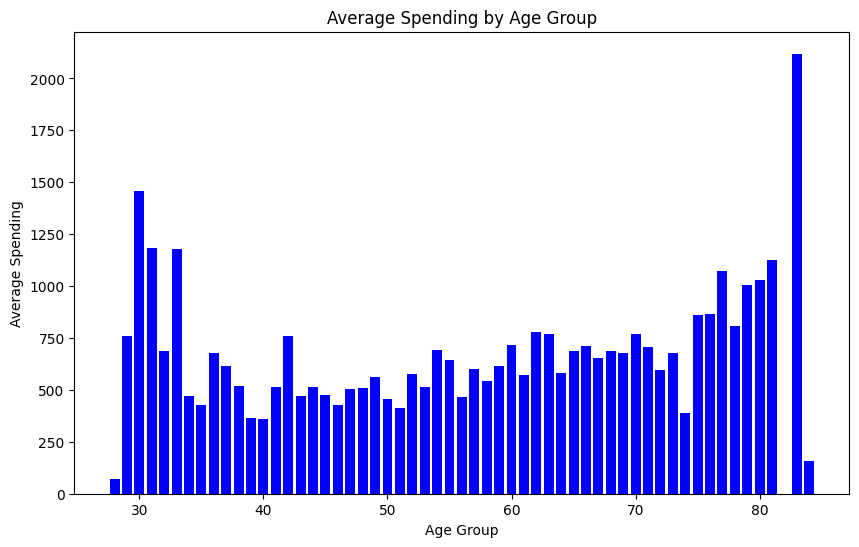

In [ ]:
# 3: What is the average spending in each age group?
# Group by 'Age' and calculate mean of 'TotalAmount_Spent'
age_groups = df_encoded['Age'].unique()
Avg_age = [df_encoded.loc[df_encoded['Age'] == age, 'TotalAmount_Spent'].mean() for age in age_groups]

# Print the results
for i in range(len(age_groups)):
    print(f"Average Spending for Age {age_groups[i]}: {Avg_age[i]}")
    print("------------------------")

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(age_groups, Avg_age, color='blue')
plt.xlabel('Age Group')
plt.ylabel('Average Spending')
plt.title('Average Spending by Age Group')
plt.show()

- 30-31,33 and 81,83 age groups have  maximum spending amount.
- 28, 34,35,39 40 and 80 age groups have  minimum spending amount.

In [ ]:
# 3: What is the average spending in each age group?
# Group by 'Age' and calculate mean of 'TotalAmount_Spent'
age_groups = df_encoded['Age'].unique()
Avg_age = [df_encoded.loc[df_encoded['Age'] == age, 'TotalAmount_Spent'].mean() for age in age_groups]

# Print the results
for i in range(len(age_groups)):
    print(f"Average Spending for Age {age_groups[i]}: {Avg_age[i]}")
    print("------------------------")

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(age_groups, Avg_age, color='blue')
plt.xlabel('Age Group')
plt.ylabel('Average Spending')
plt.title('Average Spending by Age Group')
plt.show()

In [74]:
df_encoded.columns

Index(['ID', 'Income', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country', 'Country__AUS',
       'Country__CA', 'Country__GER', 'Country__IND', 'Country__ME',
       'Country__SA', 'Country__SP', 'Country__US', 'Customer_Dormancy', 'Age',
       'Revenue_generated', 'Total_Purchases', 'TotalAmount_Spent'],
      dtype='object')

In [103]:
df_encoded[['Country__AUS', 'Country__CA', 'Country__GER', 'Country__IND', 'Country__ME', 'Country__SA', 'Country__SP', 'Country__US']] = df_encoded[['Country__AUS', 'Country__CA', 'Country__GER', 'Country__IND', 'Country__ME', 'Country__SA', 'Country__SP', 'Country__US']].astype(int)

In [112]:
#  5 Which Country has the greatest number of customers who accepted the last campaign

# Calculate the number of customers who accepted the last campaign for each country
campaign_acceptance = df_encoded[df_encoded['AcceptedCmp5'] == 1][['Country__AUS', 'Country__CA', 'Country__GER', 'Country__IND', 'Country__ME', 'Country__SA', 'Country__SP', 'Country__US']].sum()

# Find the country with the greatest number of customers who accepted the last campaign
max_country = campaign_acceptance.idxmax()
max_count = campaign_acceptance.max()

print(f"Country with the greatest number of customers who accepted the last campaign: {max_country} with {max_count} customers")

Country with the greatest number of customers who accepted the last campaign: Country__SP with 89 customers


### Data-driven insights 


1. Country with the greatest acceptance: Spain (Country__SP) has the highest number of customers who accepted the last campaign, with 89 customers.

2. Revenue distribution: Each Mint Product generates an equal amount of revenue, indicating a balanced product portfolio.

3. Age-wise spending:
    - Maximum spending: 33, 81, 31 age groups 
    - Minimum spending: 28, 34, 35, 39, 40, 80 age groups

4. Campaign performance:
    - Most loyal customers: Campaign 2
    - Most active customers: Campaign 2
    - Maximum customer count: AcceptedCmp4 (167 customers)
    - Maximum purchase: AcceptedCmp4 (3291.0)
    - Maximum revenue: AcceptedCmp5 (247845.0)
  


### Recommendations:




1. Target Spanish customers: Focus marketing efforts on Spanish customers, given their high acceptance rate.

2. Product optimization: Analyze Mint Products to identify opportunities for growth, despite equal revenue distribution.

3. Age-based targeting:
    - Offer personalized promotions to high-spending age groups (33, 81, 31)
    - Develop strategies to increase spending among low-spending age groups (28, 34, 35, 39, 40, 80)

4. Campaign refinement:
    - Build on the success of Campaign 2 by identifying its key factors and applying them to future campaigns
    - Optimize AcceptedCmp4 to increase revenue, given its high customer count and purchase value
    - Analyze AcceptedCmp5 to understand its revenue-generating factors and apply them to future campaigns
  

### Future work:

- Number of purchases and amount spent on different media channels is not available, making it challenging to determine revenue and decide on the best campaign.
- Relying solely on Mint product sales data may not be sufficient, as it lacks information on quantity sold, which could lead to inaccurate results.
- To make informed decisions, additional data is needed, such as:
    - Quantity sold for each Mint product
    - Revenue generated from each media channel
    - Customer demographics and purchase behavior across different media channels
- With this additional data, we can:
    - Analyze the effectiveness of each media channel
    - Identify opportunities to optimize marketing campaigns
    - Develop targeted strategies to increase revenue and improve overall business performance"
